# Allergen in Food Product

Food Allergens is a substance present in food that can cause adverse
immunogenic reaction to antigens with only small quantity. An allergic reaction usually manifests itself right away after eating and the symtomps usually related to the digestive systems (abdominal pain, bloating, vomiting, diarrhea), the respiratory systems (sneezing, coughing, asthma), the skin (itching, edema, urticaria, eczema), or the extreme is loss of conciousness (Winterova et al., 2021). <br>
So in this case, machine learning can be utilize to predict food safety by analyzing patterns from previous food safety and associated data. Early warning and predictive modeling techniques could be helpful in process of putting up food safety monitoring programs. By combining these information, it could improve the quality and cost-effectiveness of monitoring (Wang et al., 2021).


The aim of this project: Do exploratory data analysis (EDA) related to the Allergens and develop models that predict if the food products contains an allergen or not, based on the dataset. The description of the columns are: <br>
1. **Food Product**: the name of the food product
2. **Main ingredient**: primary ingredent used in the food product
3. **Sweetener**: Any sweetening agent present in the product
4. **Fat/oil**: Type of fat or oil used in the food product
5. **Seasoning**: Seasoning or spices used to flavor the dish
6. **Allergen**: A list of allergens associated with food item specifying allergenic present
7. **Price ($)**: The price of the food product
8. **Customer rating**: with a scale of 5 reflecting their satisfaction
9. **Prediction**: Classification indicating whether food product contains allergen or not

## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import shap
style.use('fivethirtyeight')

## Load Dataset

In [3]:
# Mounting Google Drive in Colab
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [4]:
df = pd.read_excel('/content/gdrive/MyDrive/project_1_end_dataset/clean_augmented_logical.xlsx')

## Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637 entries, 0 to 1636
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Food Product                1637 non-null   object 
 1   Main Ingredient             1637 non-null   object 
 2   Sweetener                   250 non-null    object 
 3   Fat/Oil                     1585 non-null   object 
 4   Seasoning                   1623 non-null   object 
 5   Allergens                   865 non-null    object 
 6   Price ($)                   1637 non-null   float64
 7   Customer rating (Out of 5)  1637 non-null   float64
 8   Prediction                  1636 non-null   object 
dtypes: float64(2), object(7)
memory usage: 115.2+ KB


No data types errors exist in all columns. However, there are numerous missing value in categorical columns. In order make it easier to read due to the description above, the column name of *Customer rating (Out of 5)* changed into just *Customer rating*. Since it must be numerical in order for the model to handle the data, *Prediction* would be the target and would be much easier to convert into *Is_Allergen* with the value of 1 (True) and 0 (False).

In [6]:
#Rename the columns name
df['Prediction'] = df['Prediction'].map({'Contains':1,'Does not contain':0})
df = df.rename(columns= {'Customer rating (Out of 5)' : 'Customer rating',
                         'Prediction' : 'Is_Allergen'})

In [23]:
df=df[['Food Product','Main Ingredient','Sweetener','Fat/Oil','Seasoning','Allergens','Is_Allergen']]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637 entries, 0 to 1636
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Food Product     1637 non-null   object 
 1   Main Ingredient  1637 non-null   object 
 2   Sweetener        250 non-null    object 
 3   Fat/Oil          1585 non-null   object 
 4   Seasoning        1623 non-null   object 
 5   Allergens        865 non-null    object 
 6   Is_Allergen      1636 non-null   float64
dtypes: float64(1), object(6)
memory usage: 89.7+ KB


###  Descriptive analysis

In [25]:
categorical = ['Food Product','Main Ingredient','Sweetener','Fat/Oil','Seasoning','Allergens']
numerical = ['Is_Allergen']

In [26]:
df[categorical].describe()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens
count,1637,1637,250,1585,1623,865
unique,1033,134,9,32,184,37
top,Koshari Special,"Flour, Cheese",Sugar,Olive oil,Spices,"Wheat, Dairy"
freq,29,113,191,1020,177,260


According to the unique values above, the descriptive analysis of categorical can be describe below: <br>
1. **Food product** has *259* unique values with **Stuffed Bell Peppers** are the category leader
2. There are *101* unique value in **Main Ingredient** and **Chicken** is the ranking highest for almost 65 values
3. Nearly all of the data in this dataset include **Sugar** with only *9* unique values and *None* commonly occurring
4. **Fat/Oil** has *35* distinct values with **Olive oil** is the largest number in this category.
5. **Seasoning** possesses *185* distinct values and **Soy sauce** at the top frequent number
6. The unique values of **Allergens** is *39* with **Dairy** Allergens presents more than half of the data

In [27]:
df[numerical].describe()

,Is_Allergen
count,1636.000000
mean,0.545232
std,0.498102
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


The numerical data can be described as follows : <br>
1. Customers spend money approximately *5 dollar* minimum for the food products with the average of *12.4 dollar* and maximum spend for almost *20 dollar*
2. Customers often assign minimum rating by *1* and average rating of *3* and maximum rating of *5*

### Univariate analysis

#### Numerical

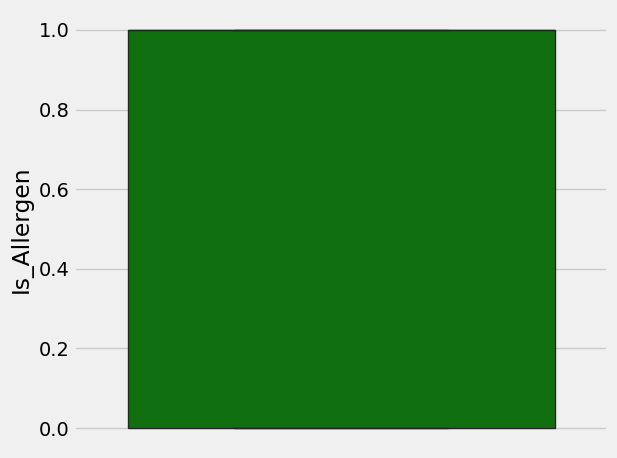

In [28]:
for i in range(0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.boxplot(y=df[numerical[i]], color='green')
    plt.tight_layout()

The absence of outliers in numerical columns indicates that the distributions are normal

#### Categorical

##### Food Products

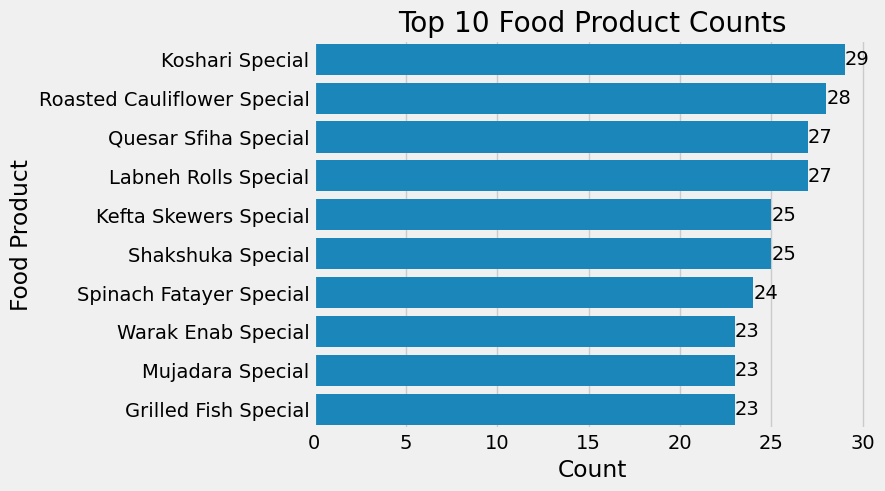

In [29]:
ax = sns.countplot(y=df['Food Product'],orient='v', order=df['Food Product'].value_counts(sort=True).iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.title('Top 10 Food Product Counts')
plt.show()

Based on the counts of top 10 food products. Top 1 through top 5 have comparable counts with the number of 4

In [21]:
df[df['Food Product']=='Koshari Special']

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating,Is_Allergen
1299,Koshari Special,"Rice, Lentils, Pasta",NaN,Vegetable oil,"Tomato sauce, Garlic",NaN,24.05,4.6,0.0
1342,Koshari Special,"Rice, Lentils, Pasta",NaN,Vegetable oil,"Tomato sauce, Garlic",NaN,23.43,3.3,0.0
1370,Koshari Special,"Rice, Lentils, Pasta",NaN,Vegetable oil,"Tomato sauce, Garlic",NaN,14.08,1.5,0.0
1386,Koshari Special,"Rice, Lentils, Pasta",NaN,Vegetable oil,"Tomato sauce, Garlic",NaN,15.15,4.1,0.0
1390,Koshari Special,"Rice, Lentils, Pasta",NaN,Vegetable oil,"Tomato sauce, Garlic",NaN,11.80,1.2,0.0
1419,Koshari Special,"Rice, Lentils, Pasta",NaN,Vegetable oil,"Tomato sauce, Garlic",NaN,18.64,2.6,0.0
1427,Koshari Special,"Rice, Lentils, Pasta",NaN,Vegetable oil,"Tomato sauce, Garlic",NaN,9.71,1.3,0.0
1431,Koshari Special,"Rice, Lentils, Pasta",NaN,Vegetable oil,"Tomato sauce, Garlic",NaN,15.72,3.5,0.0
1432,Koshari Special,"Rice, Lentils, Pasta",NaN,Vegetable oil,"Tomato sauce, Garlic",NaN,13.02,2.9,0.0
1433,Koshari Special,"Rice, Lentils, Pasta",NaN,Vegetable oil,"Tomato sauce, Garlic",NaN,4.35,2.1,0.0


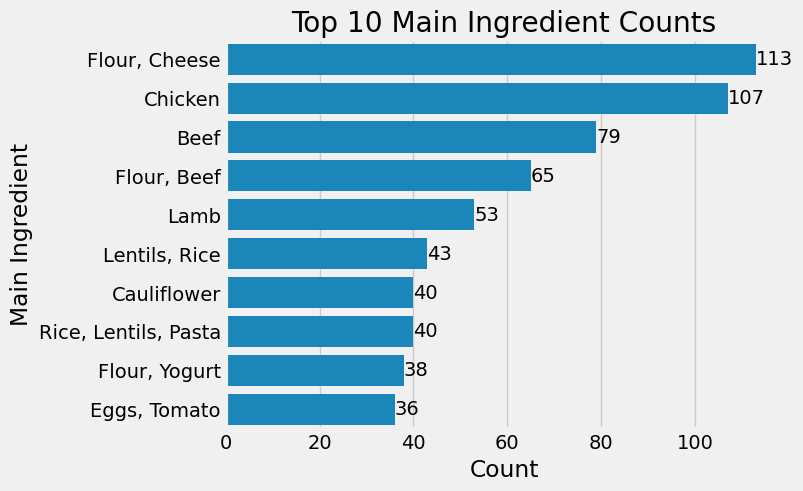

In [13]:
ax = sns.countplot(y=df['Main Ingredient'],orient='v', order=df['Main Ingredient'].value_counts(sort=True).iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.title('Top 10 Main Ingredient Counts')
plt.show()

Chicken predominates the Main Ingredient and has a notable distinction
counts with flour for the difference number of 45. There were a few changes between the top 2 and top 10 after that.

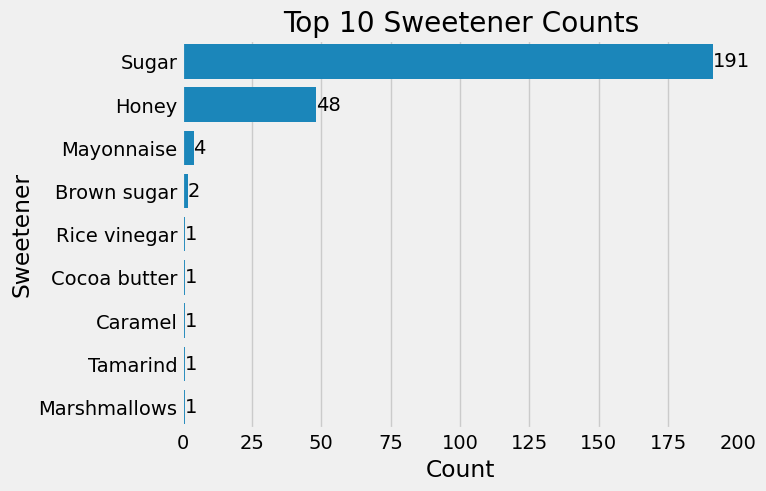

In [14]:
ax = sns.countplot(y=df['Sweetener'],orient='v', order=df['Sweetener'].value_counts(sort=True).iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.title('Top 10 Sweetener Counts')
plt.show()

Sugar have the greatest count of 92, followed by Honey in second place. After Honey, Mayonnaise emerged as the third rank ingredient.

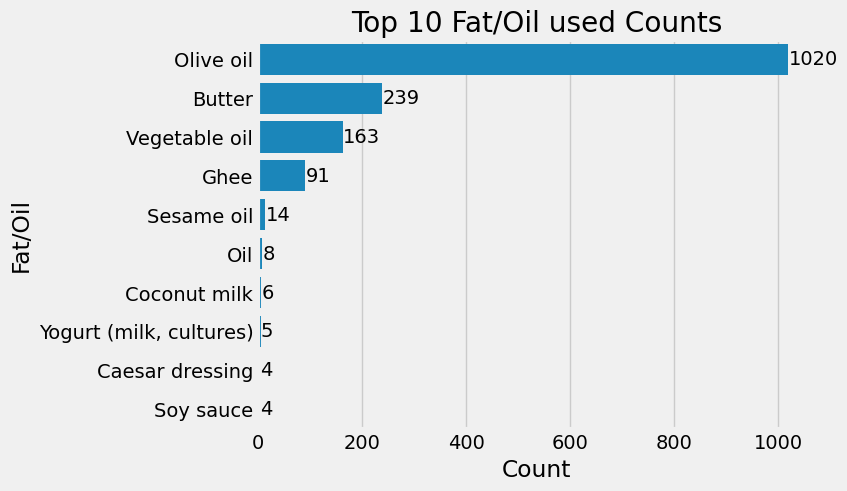

In [15]:
ax = sns.countplot(y=df['Fat/Oil'],orient='v', order=df['Fat/Oil'].value_counts(sort=True).iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.title('Top 10 Fat/Oil used Counts')
plt.show()

For the fat/oil type, olive oil as the top frequently used only has 5 differences with butter as the second top.

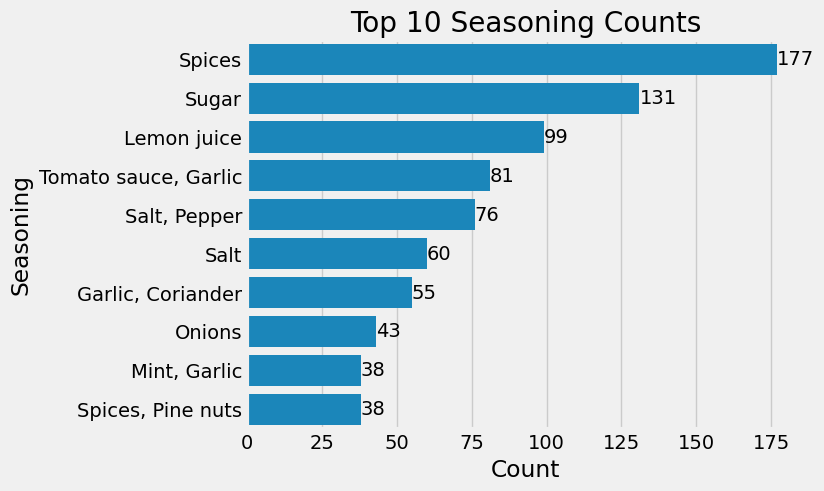

In [30]:
ax = sns.countplot(y=df['Seasoning'],orient='v', order=df['Seasoning'].value_counts(sort=True).iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.title('Top 10 Seasoning Counts')
plt.show()

Soy sauce frequently exists with total of 15 and only has 4 differences with flour

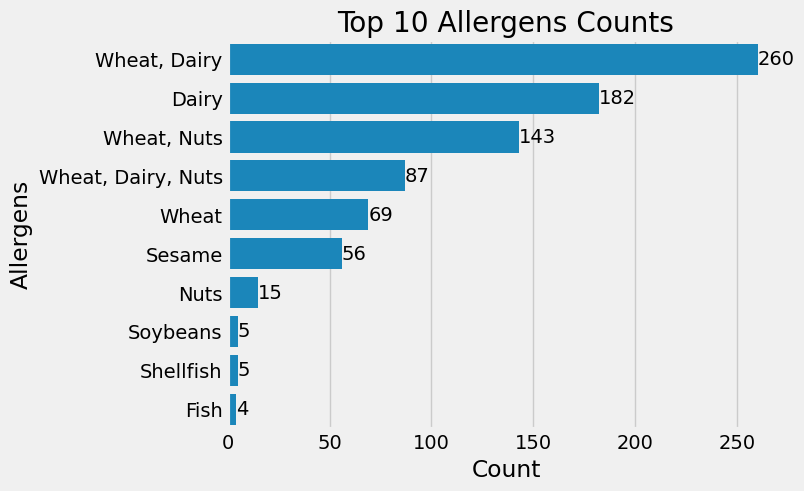

In [31]:
ax = sns.countplot(y=df['Allergens'],orient='v', order=df['Allergens'].value_counts(sort=True).iloc[:10].index)
ax.bar_label(ax.containers[0])
plt.xlabel('Count')
plt.title('Top 10 Allergens Counts')
plt.show()

Allergens in dairy lead the list with 83, Wheat, Diary comes in second place with a difference of 11. There are significant disparities between Wheat, Diary, and only Wheat for approximately 64 in the top 3 and 4. Subsequently, there is no notable difference for the remaining top allergens.

### Multivariate analysis

<Axes: >

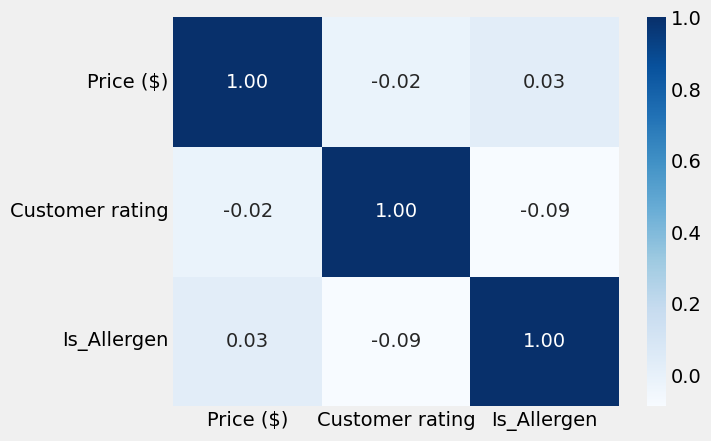

In [ ]:
# sns.heatmap(data=df[numerical].corr(method='kendall'), annot=True, cmap = 'Blues', fmt='.2f')

It can be seen there are no strong correlation over all numerical features (below 10%)

## Exploratory Data Analysis

Text(0.5, 1.0, 'Percentage of Allergen contains in Foods')

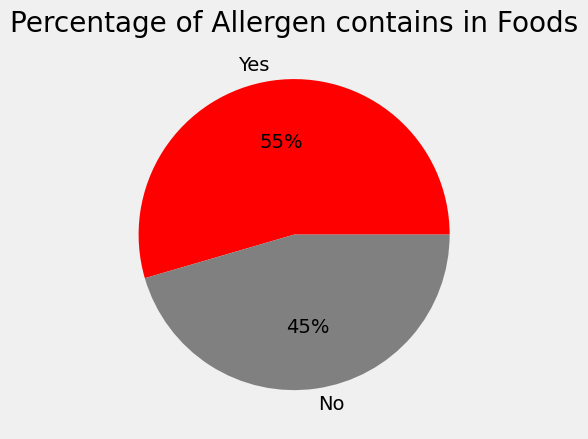

In [32]:
#palette_col = sns.color_palette('red')
label = ['Yes','No']
ax = plt.pie(x = df['Is_Allergen'].value_counts(), labels=label, autopct='%.0f%%',colors=['red','grey'])
plt.title('Percentage of Allergen contains in Foods')

According to the graphs, 36% of food products are safe to eat, while roughly 64%, include allergens. This ought to raise awareness about selecting foods free of allergies. Thus, we need to be aware of the list of dietary items that include anticipated allergies.

### Percentage of Food Product Potentially Contains Allergens

In [33]:
df2 = df.groupby(['Food Product']).agg({'Is_Allergen' : 'sum'}).reset_index()
df2.sort_values(by= 'Is_Allergen', ascending=False)

,Food Product,Is_Allergen
766,Quesar Sfiha Special,27.0
582,Labneh Rolls Special,27.0
923,Spinach Fatayer Special,24.0
149,Cheese Manakish Special,22.0
758,Pistachio Baklava Special,19.0
...,...,...
1025,Warak Enab Deluxe,0.0
1024,Warak Enab,0.0
1021,Veggie Omelette,0.0
1020,Veggie Burger,0.0


Text(0.5, 1.0, 'Top 10 Total Percentage of Food Products which Contains Allergens')

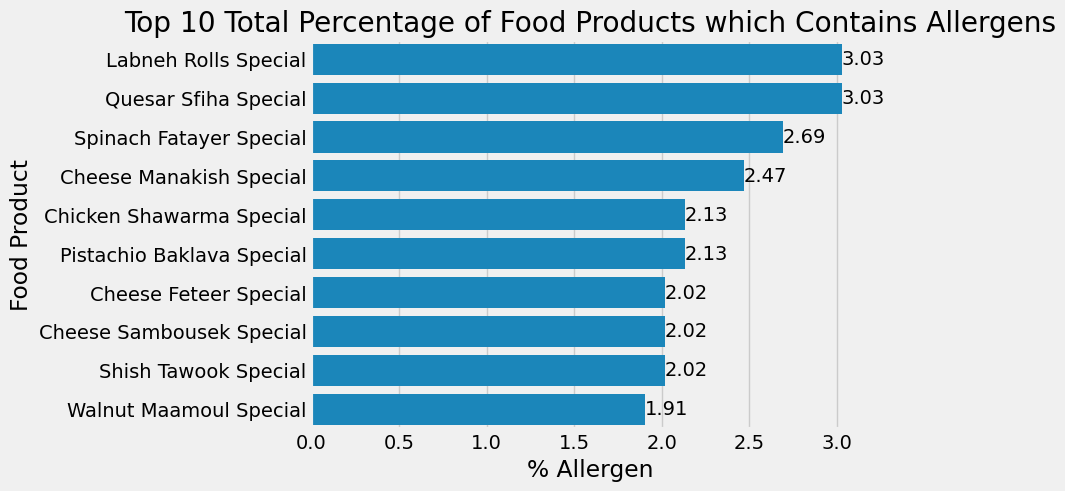

In [34]:
df_food = (df.groupby(['Food Product']).agg({'Is_Allergen' : 'sum'})/df['Is_Allergen'].sum()*100).reset_index()
df_food.columns = ['Food Product','Percent_Allergen']
df_food
ax = sns.barplot(y='Food Product', x='Percent_Allergen', data=df_food.nlargest(10,'Percent_Allergen'))
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.xlabel('% Allergen')
plt.ylabel('Food Product')
plt.title('Top 10 Total Percentage of Food Products which Contains Allergens')

*Caesar Salad Wrap* contains the most percentage allergen with the number of 1.57% of total allergen followed by the others with 1.18% until the last 10th position. Consequently, we are able to dissect the primary component of these items that is associated with allergies.

### Main Ingredient contains Allergens

Text(0.5, 1.0, 'Top 10 Total Percentage of Main Ingredient which Contains Allergens')

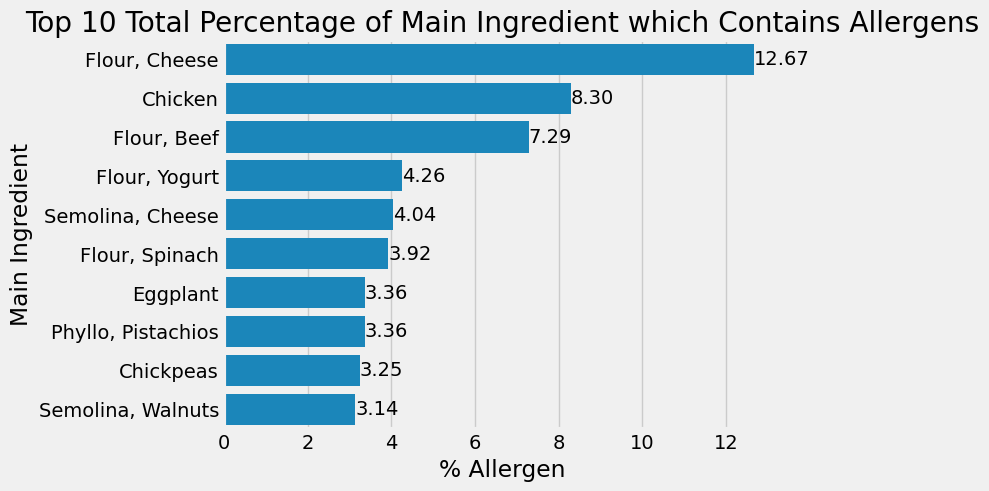

In [35]:
df_food = (df.groupby(['Main Ingredient']).agg({'Is_Allergen' : 'sum'})/df['Is_Allergen'].sum()*100).reset_index()
df_food.columns = ['Main Ingredient','Percent_Allergen']
df_food
ax = sns.barplot(y='Main Ingredient', x='Percent_Allergen', data=df_food.nlargest(10,'Percent_Allergen'))
ax.bar_label(ax.containers[0], fmt='%.2f')
plt.xlabel('% Allergen')
plt.ylabel('Main Ingredient')
plt.title('Top 10 Total Percentage of Main Ingredient which Contains Allergens')

*Chicken* as the main ingredients provide the most allergens for the food products with percentage of 13.33%, followed by *Flour* (6.27%), *Shrimp* (3.92%), *Apples* (3.14%), *Pasta* (2.75%), *Beef, Eggs, Pizza dough, and Salmon* (2.35%) and lastly *Mixed Berries* (1.96%)

In [36]:
df['Allergens'].value_counts()

,count
Allergens,
"Wheat, Dairy",260
Dairy,182
"Wheat, Nuts",143
"Wheat, Dairy, Nuts",87
Wheat,69
Sesame,56
Nuts,15
Soybeans,5
Shellfish,5


### Customer satisfaction of the food products related with Allergens

In [ ]:
# df_cr = df.groupby(['Food Product', 'Is_Allergen']).agg({'Customer rating': 'mean'}).reset_index()
# df_cr.columns = ['Food Product', 'Is_Allergen','Average_Customer_Rating']
# df_cr.sort_values(by = 'Average_Customer_Rating', ascending = False)
# ax = sns.barplot(y='Food Product', x='Average_Customer_Rating', hue = 'Is_Allergen', data=df_cr.nlargest(10,'Average_Customer_Rating'), palette= ['grey','red'])
# ax.bar_label(ax.containers[0], fmt='%.2f')
# ax.bar_label(ax.containers[1], fmt='%.2f')
# color = ['grey','red']
# plt.xlabel('Average Customer Rating')
# plt.legend(bbox_to_anchor = (1,0.5), title = 'Allergen', loc='best', labelcolor = color, frameon = False)
# plt.ylabel('Food Product')
# plt.title('Top 10 Food Products Average Rating which Contains Allergens')

As we can see, only a small number of the top food products with the highest rating—like *Presto Chicken* and *Chicken Stir-Fry*—are free of allergies. Thus, in this situation, consumers have to be aware while choosing the food we eat because it may include allergens that cause illness.

### Price of all the products related with Allergens


Text(0.5, 1.0, 'Percentage of Average price of Allergen contained and Not')

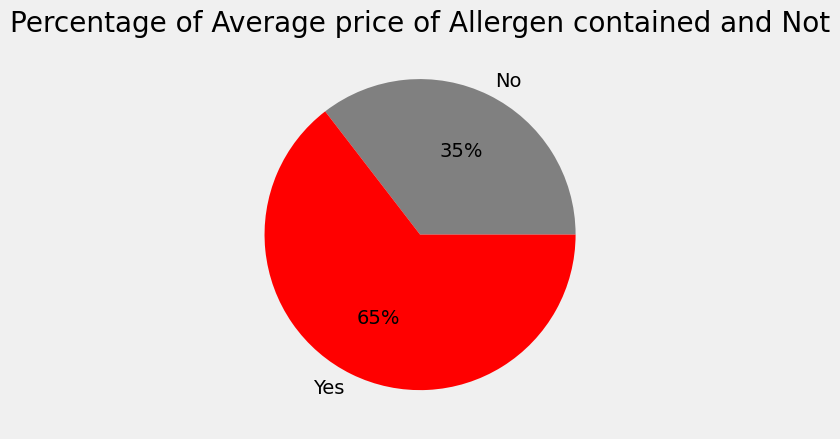

In [ ]:
# df_pr = df.groupby(['Is_Allergen']).agg({'Price ($)': 'sum'}).reset_index()
# df_pr
# label = ['No','Yes']
# ax = plt.pie(x= df_pr['Price ($)'], labels= label, autopct= '%.0f%%',colors= ['grey','red'])
# plt.title('Percentage of Average price of Allergen contained and Not')

The majority of food products with Allergen tend to have higher price rather than food without allergen <br>

Text(0.5, 1.0, 'Top 10 average price of Food Products which Contains Allergens')

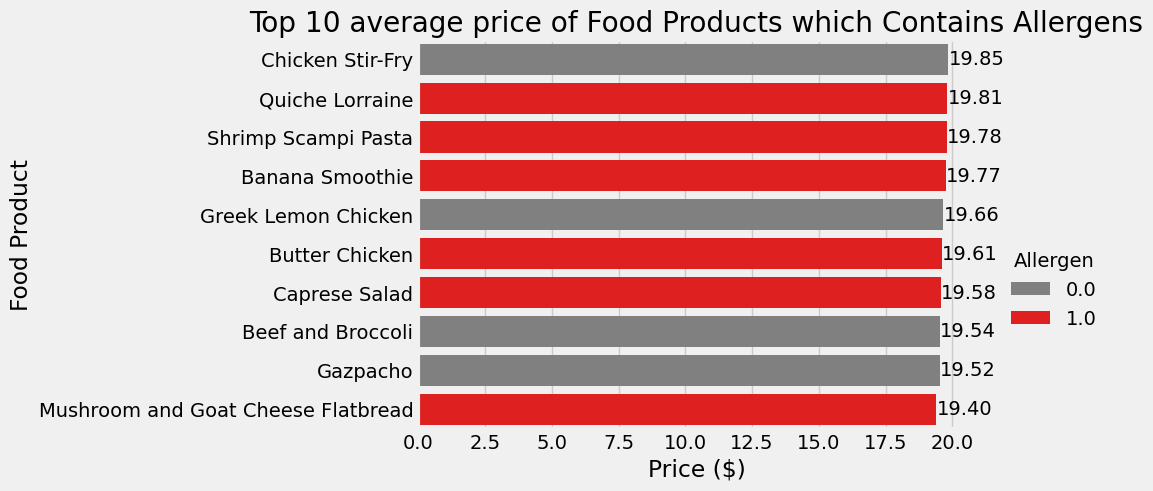

In [ ]:
# df_price = df.groupby(['Food Product','Is_Allergen']).agg({'Price ($)': 'mean'}).reset_index()
# df_price
# ax = sns.barplot(y='Food Product', x='Price ($)', data=df_price.nlargest(10,'Price ($)'), hue = 'Is_Allergen', palette = ['grey','red'])
# ax.bar_label(ax.containers[0], fmt='%.2f')
# ax.bar_label(ax.containers[1], fmt='%.2f')
# plt.legend(bbox_to_anchor = (1.25,0.5), title = 'Allergen', loc='best', frameon = False)
# plt.xlabel('Price ($)')
# plt.ylabel('Food Product')
# plt.title('Top 10 average price of Food Products which Contains Allergens')

It seems that higher price is near 20 $, but the majority of top expensive average price about 6 out of 10 are predicted contained allergen

## Data preprocessing

### Handle duplicate data

In [38]:
df.duplicated().sum()

np.int64(604)

In [39]:
df.drop_duplicates(inplace=True)

<ipython-input-39-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1033 entries, 0 to 1429
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Food Product     1033 non-null   object 
 1   Main Ingredient  1033 non-null   object 
 2   Sweetener        203 non-null    object 
 3   Fat/Oil          981 non-null    object 
 4   Seasoning        1019 non-null   object 
 5   Allergens        592 non-null    object 
 6   Is_Allergen      1032 non-null   float64
dtypes: float64(1), object(6)
memory usage: 64.6+ KB


There is no duplicated data as well. In this case we can proceed to split data test and train

### Handle Missing Value

In [41]:
df.isna().sum()

,0
Food Product,0
Main Ingredient,0
Sweetener,830
Fat/Oil,52
Seasoning,14
Allergens,441
Is_Allergen,1


There are indicated exorbitant missing value over 10% that we need to handle with. Due to the limited data, imputation can be done with filling it with the *mode* of the categorical columns

In [42]:
#Imputation with their MODE
miss_col = ['Sweetener','Fat/Oil','Seasoning','Allergens']
for i in range(len(miss_col)):
    df[miss_col[i]] = df[miss_col[i]].fillna(df[miss_col[i]].mode()[0])

<ipython-input-42-14b3c1e9f703>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[miss_col[i]] = df[miss_col[i]].fillna(df[miss_col[i]].mode()[0])


In [43]:
df.isna().sum()

,0
Food Product,0
Main Ingredient,0
Sweetener,0
Fat/Oil,0
Seasoning,0
Allergens,0
Is_Allergen,1


And for Is_Allergen only need to remove that because it is below 10% of total data

In [83]:
df_no_mv = df.dropna(axis=0)
df_no_mv.isna().sum()

,0
Food Product,0
Main Ingredient,0
Sweetener,0
Fat/Oil,0
Seasoning,0
Allergens,0
Is_Allergen,0


In [84]:
df_no_mv

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Is_Allergen
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",1.0
1,Chicken Noodle Soup,Chicken broth,Sugar,Olive oil,Salt,"Chicken, Wheat, Celery",1.0
2,Cheddar Cheese,Cheese,Sugar,Olive oil,Salt,Dairy,1.0
3,Ranch Dressing,Buttermilk,Sugar,Vegetable oil,"Garlic, herbs",Dairy,1.0
4,Caramel Popcorn,Popcorn,Sugar,Butter,Salt,Dairy,1.0
...,...,...,...,...,...,...,...
1364,Beetroot Salad Deluxe,Beetroot,Sugar,Olive oil,Lemon juice,Dairy,0.0
1382,Mini Ful Medames,Fava beans,Sugar,Olive oil,"Lemon juice, Garlic",Dairy,0.0
1392,Ful Medames Deluxe,Fava beans,Sugar,Olive oil,"Lemon juice, Garlic",Dairy,0.0
1406,Ful Medames Special,Fava beans,Sugar,Olive oil,"Lemon juice, Garlic",Dairy,0.0


After cleaning the missing value and other preprocessing step, proceed to the feature encoding

### Feature encoding (One Hot Encoding / Dummy Variables)
In order to improve the usability of the numerical model's data, this step will convert categorical variables into numerical variables using *One Hot Encoding*. As a result, each category will have binary columns.

In [85]:
categorical

['Food Product',
 'Main Ingredient',
 'Sweetener',
 'Fat/Oil',
 'Seasoning',
 'Allergens']

In [47]:
#One Hot Encoding
df_encodetrain= pd.get_dummies(df_no_mv[categorical], drop_first= True, sparse=False, dtype=int)
df_no_mv.drop(categorical, axis= 1, inplace= True)
df_encode = df_no_mv.join(df_encodetrain)
df_encode

<ipython-input-47-20f9e506833c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_mv.drop(categorical, axis= 1, inplace= True)


,Is_Allergen,Food Product_Aloo Gobi,Food Product_Apple,Food Product_Apple Cider,Food Product_Apple Crisp,Food Product_Apple Pie,Food Product_Arabian Baba Ghanoush,Food Product_Arabian Falafel,Food Product_Arabian Fattoush,Food Product_Arabian Harira,...,"Allergens_Shellfish, Pork","Allergens_Shellfish, Soybeans",Allergens_Soybeans,"Allergens_Soybeans, Fish",Allergens_Wheat,"Allergens_Wheat, Dairy","Allergens_Wheat, Dairy, Cocoa","Allergens_Wheat, Dairy, Nuts","Allergens_Wheat, Nuts","Allergens_Wheat, Pork, Dairy"
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1382,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1392,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1406,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
from sklearn.preprocessing import OneHotEncoder

categorical = ['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning', 'Allergens']

encoder = OneHotEncoder(handle_unknown="ignore", drop="first")
encoder.fit(df_no_mv[categorical])

import joblib
joblib.dump(encoder, "preprocessor.pkl")


['preprocessor.pkl']

## Train and Test Data Split
After preprocessing the data, proceed to train and test data split with the percentage of 70:30 <br>
In order to prevent data leakage for modeling that could result in a *overfitting* model, split data must be completed before handling outliers, transformations, and other processes.

In [51]:
# Define target and features
target = df_encode['Is_Allergen']
inputs = df_encode.drop('Is_Allergen', axis=1)

#split data test and train (30:70)
X_train, X_test, Y_train, Y_test= train_test_split(inputs, target, test_size= 0.3, train_size= 0.7, random_state= 17)

### Handle Outlier and Transformation

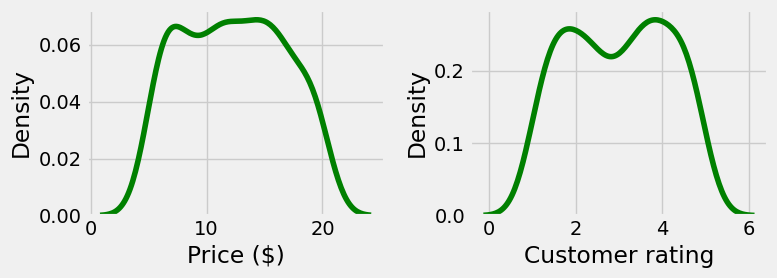

In [ ]:
# #Check the distribution of X_train
# features = ['Price ($)', 'Customer rating']
# plt.figure(figsize = (8,3))
# for i in range(0, len(features)):
#     plt.subplot(1, len(features), i+1)
#     sns.kdeplot(x=X_train[features[i]], color='green')
#     plt.tight_layout()

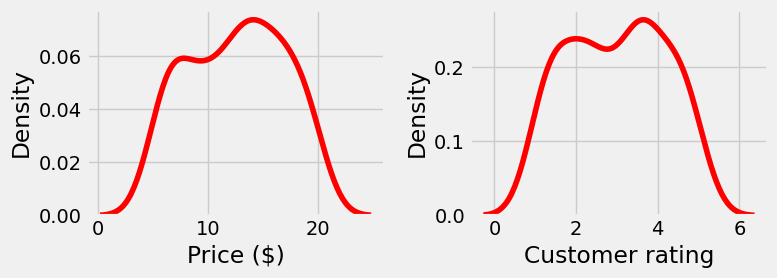

In [ ]:
# #Check the distribution of X_test
# features = ['Price ($)', 'Customer rating']
# plt.figure(figsize = (8,3))
# for i in range(0, len(features)):
#     plt.subplot(1, len(features), i+1)
#     sns.kdeplot(x=X_test[features[i]], color='red')
#     plt.tight_layout()

Since there are no outliers in the numerical data, both the X_train and X_test exhibit a normal distribution refers to the preceding boxplot, leaving us with nothing to work with. Once the data has been preprocessed, we may build our model.

## Modelling
In this step, *Supervised Learning* and *Ensemble Learning* have been used to develop different models based on Allergen Prediction (1 and 0). Our goal is to create a model that can predict the allergen with the supplied attributes. (br>
In order to automate the evaluation of any model we build, we must first define a number of metrics that we can use: <br>
First, we have to define several metrics that we could evaluate and store it into the function to automate evaluate all the model we will create : <br>
1. Accuracy
2. Recall
3. Precision
4. Area Under Curve (AUC)
5. F1 score <br>

In [52]:
# Model Evaluation
def model_eval(model):
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    recall_train = recall_score(Y_train, Y_pred_train)
    recall_test = recall_score(Y_test, Y_pred_test)
    precision_train = precision_score(Y_train, Y_pred_train)
    precision_test = precision_score(Y_test, Y_pred_test)
    accuracy_train = accuracy_score(Y_train, Y_pred_train)
    accuracy_test = accuracy_score(Y_test, Y_pred_test)
    roc_auc_train = roc_auc_score(Y_train, Y_pred_train)
    roc_auc_test = roc_auc_score(Y_test, Y_pred_test)
    f1_train = f1_score(Y_train, Y_pred_train)
    f1_test = f1_score(Y_test, Y_pred_test)
    print('Recall train score:', + recall_train)
    print('Recall test score:', + recall_test)
    print('Precision train score:', + precision_train)
    print('Precision test score:', + precision_test)
    print('Accuracy train:', + accuracy_train)
    print('Accuracy test:', + accuracy_test)
    print('Roc_auc train score:', + roc_auc_train)
    print('Roc_auc test score:', + roc_auc_test)
    print('f1 train score:', + f1_train)
    print('f1 test score', + f1_test)
    cm_test= confusion_matrix(Y_test, Y_pred_test)
    cm_display = ConfusionMatrixDisplay(cm_test, display_labels = ['Not Allergen','Allergen'])
    cm_display.plot()
    plt.show()
    return recall_train, recall_test

Cross Validation is also included into evaluate the splitting of data rain and test in order to determine whether the model is *overfitting* and to verify the consistency and variance of our model using the metrics of *Standard deviation*

In [53]:
#Cross Validation function
def cv(model):
  score_cv = cross_validate(model, X_train, Y_train, scoring='recall', cv=5, return_train_score=True)
  print('Data train Cross Validate Standard Deviation:', + score_cv['train_score'].std())
  print('Data train recall mean:', + score_cv['train_score'].mean())
  print('Data test recall mean:', + score_cv['test_score'].mean())

The models that need to be developed are:
1. Logistic Regression
2. KNearest Neighbors
3. Decision Tree
4. Random Forest
5. AdaBoost
6. XGBoost

### 1. Logistic Regression
It is the basic algorithm based on non-linear data that covers categorical data with a possible outcome of 0 or 1 (binary prediction) <br>


In [54]:
reg = LogisticRegression()
reg.fit(X_train,Y_train)

LogisticRegression()

Recall train score: 0.9724137931034482
Recall test score: 0.953757225433526
Precision train score: 1.0
Precision test score: 1.0
Accuracy train: 0.9833795013850416
Accuracy test: 0.9741935483870968
Roc_auc train score: 0.9862068965517241
Roc_auc test score: 0.976878612716763
f1 train score: 0.986013986013986
f1 test score 0.9763313609467456


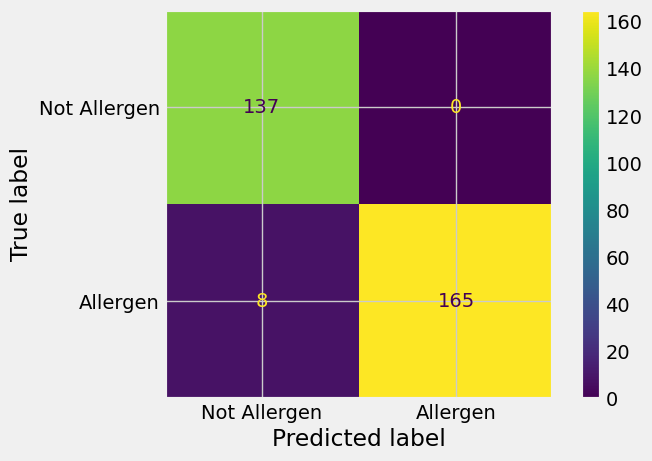

(0.9724137931034482, 0.953757225433526)

In [55]:
model_eval(reg)

In [56]:
cv(reg)

Data train Cross Validate Standard Deviation: 0.004668987588871281
Data train recall mean: 0.9729885057471265
Data test recall mean: 0.9126436781609195


Logistic regression models show consistency with low standard deviation

### 2. K-Nearest Neighbors (KNN)
KNN is a one of the Supervised Learning type based on how close our data test point with data train point. After that, we vote for the majority for the closest existing point by their distance.

In [57]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

Recall train score: 0.9471264367816092
Recall test score: 0.9364161849710982
Precision train score: 0.9648711943793911
Precision test score: 0.9642857142857143
Accuracy train: 0.9473684210526315
Accuracy test: 0.9451612903225807
Roc_auc train score: 0.9474308142096199
Roc_auc test score: 0.9463102822665711
f1 train score: 0.9559164733178654
f1 test score 0.9501466275659824


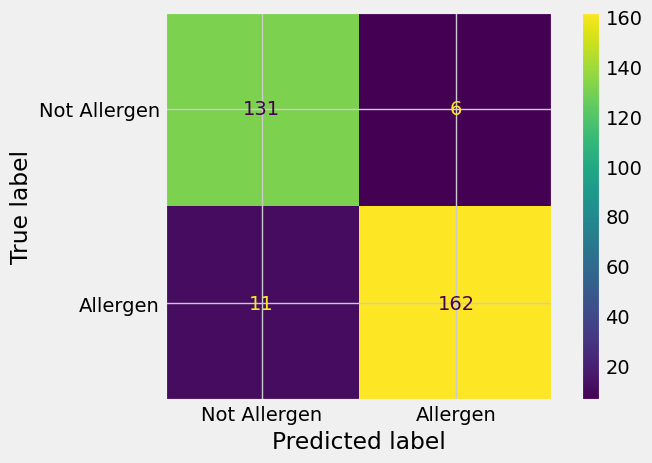

(0.9471264367816092, 0.9364161849710982)

In [58]:
model_eval(knn)

In [59]:
cv(knn)

Data train Cross Validate Standard Deviation: 0.00937327955764373
Data train recall mean: 0.9408045977011493
Data test recall mean: 0.903448275862069


KNN still displays consistency with little number of standard deviation

### 3. Decision Tree
Decision Tree is a flow chart machine learning with a shape of tree to make a decision which can be used for categorical or numerical.

In [60]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

Recall train score: 1.0
Recall test score: 0.9826589595375722
Precision train score: 1.0
Precision test score: 0.9770114942528736
Accuracy train: 1.0
Accuracy test: 0.9774193548387097
Roc_auc train score: 1.0
Roc_auc test score: 0.9767309396228009
f1 train score: 1.0
f1 test score 0.9798270893371758


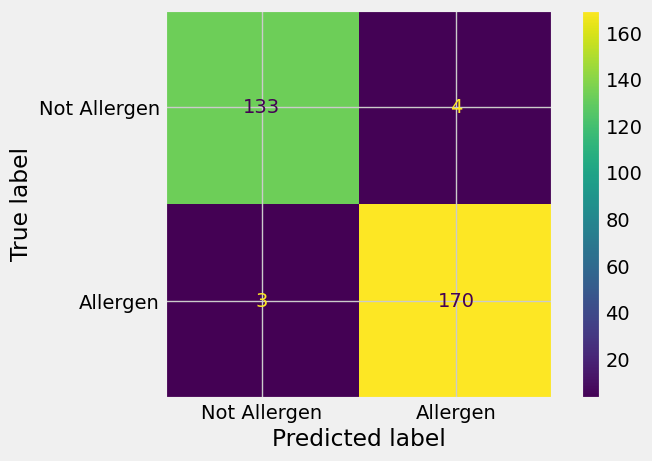

(1.0, 0.9826589595375722)

In [61]:
model_eval(dec_tree)

In [62]:
cv(dec_tree)

Data train Cross Validate Standard Deviation: 0.0
Data train recall mean: 1.0
Data test recall mean: 0.9241379310344827


Similar with Decision Tree with low standard deviation

### 4. Random Forest
This model is one of the ensemble learning type called Boosting Aggregating (*Bagging*) . Random forest model consists of numerous subset of decision tree to increase the prediction performance in order to reduce variance (*Overfitting*)

In [63]:
rand_for = RandomForestClassifier()
rand_for.fit(X_train,Y_train)

RandomForestClassifier()

Recall train score: 1.0
Recall test score: 0.9595375722543352
Precision train score: 1.0
Precision test score: 0.9822485207100592
Accuracy train: 1.0
Accuracy test: 0.967741935483871
Roc_auc train score: 1.0
Roc_auc test score: 0.9688198810176786
f1 train score: 1.0
f1 test score 0.9707602339181286


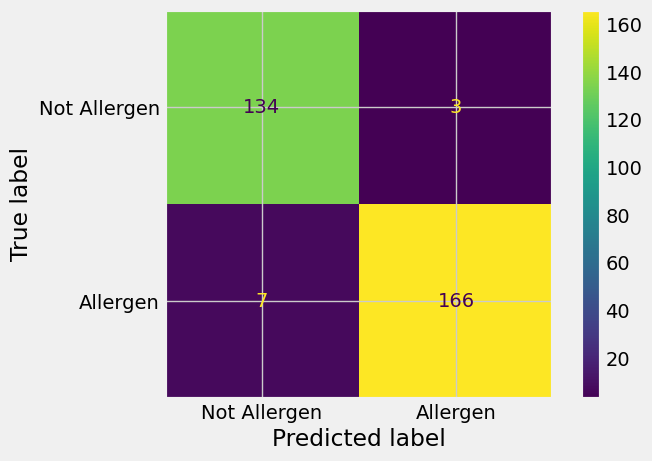

(1.0, 0.9595375722543352)

In [64]:
model_eval(rand_for)

In [65]:
cv(rand_for)

Data train Cross Validate Standard Deviation: 0.0
Data train recall mean: 1.0
Data test recall mean: 0.903448275862069


Similar with random forest's standard deviation below 0.02

### 5. AdaBoost
Adaboost is one of the algortihm that use boosting type of ensemble learning. This model strengthen the prediction by increasing the weight (variable coefficient) to reduce bias (*Underfitting*)

Recall train score: 0.8459770114942529
Recall test score: 0.8554913294797688
Precision train score: 0.997289972899729
Precision test score: 1.0
Accuracy train: 0.9058171745152355
Accuracy test: 0.9193548387096774
Roc_auc train score: 0.9212463454683808
Roc_auc test score: 0.9277456647398844
f1 train score: 0.9154228855721394
f1 test score 0.9221183800623053


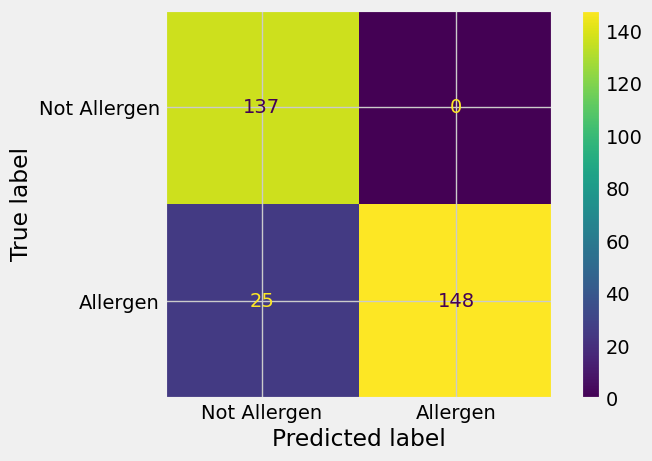

(0.8459770114942529, 0.8554913294797688)

In [66]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train,Y_train)
model_eval(adaboost)

In [67]:
cv(adaboost)

Data train Cross Validate Standard Deviation: 0.015485279983112029
Data train recall mean: 0.8465517241379311
Data test recall mean: 0.8229885057471265


Adaboost show consistency with low standard deviation

### 6. XGBoost
XGBoost has the similar method with AdaBoost to repair the model tree and to strengthen the prediction. However, XGBoost have regularization concept to prevent *Overfitting* as well.

Recall train score: 0.9195402298850575
Recall test score: 0.9248554913294798
Precision train score: 0.9876543209876543
Precision test score: 0.975609756097561
Accuracy train: 0.9445983379501385
Accuracy test: 0.9451612903225807
Roc_auc train score: 0.9510593135488006
Roc_auc test score: 0.9478292055187546
f1 train score: 0.9523809523809523
f1 test score 0.9495548961424333


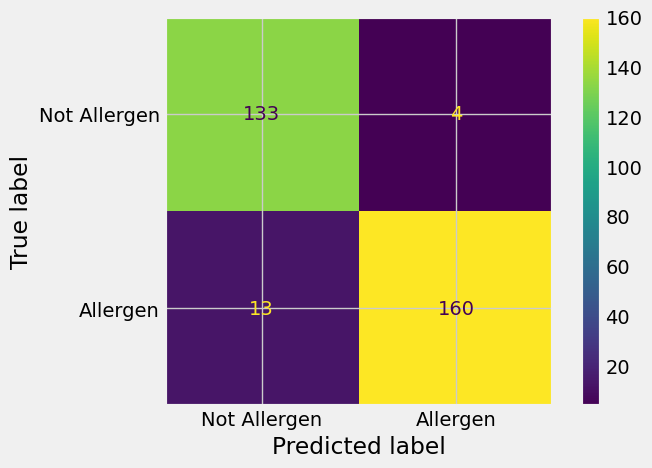

(0.9195402298850575, 0.9248554913294798)

In [68]:
xgboost = XGBClassifier()
xgboost.fit(X_train,Y_train)
model_eval(xgboost)

In [69]:
cv(xgboost)

Data train Cross Validate Standard Deviation: 0.01096481840709134
Data train recall mean: 0.92183908045977
Data test recall mean: 0.9126436781609195


Similar with Adaboost, XGBoost show consistency with low standard deviation

### Best Model
The best metrics to use is **Recall**, since it reduce *False Negative* which occurs when algorithms predict food products do not contain allergen, but in reality, they actually do. Therefore, we must eradicate it because missing the prediction could have a negative impact on human body and loss potential customers in the future.

In [71]:
model = ['Logistic Regression', 'KNN','Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost']
best_model = pd.DataFrame()
best_model['Model'] = model
best_model['Recall Train'] = [0.97, 0.94, 1.0, 1.0, 0.84, 0.92]
best_model['Recall Test'] = [0.91, 0.90, 0.92, 0.90, 0.82, 0.91]
best_model

,Model,Recall Train,Recall Test
0,Logistic Regression,0.97,0.91
1,KNN,0.94,0.90
2,Decision Tree,1.00,0.92
3,Random Forest,1.00,0.90
4,AdaBoost,0.84,0.82
5,XGBoost,0.92,0.91


As we can see, the lowest recall test is *KNN* because the mechanism that use too high computation to calculate all the distance between data points. All algorithms show *overfitting* data with almost 10% difference. Best recall test is **AdaBoost** with 88%. Therefore, AdaBoost can be progress to hyperparameter tuning in order to do regularization to decrease overfitting

### Hyperparameter Tuning
This step focus on how to configure the parameter in order to regulate the models to reduce overfitting in AdaBoost

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 

Recall train score: 0.9523809523809523
Recall test score: 0.8787878787878788
Precision train score: 0.967741935483871
Precision test score: 0.8656716417910447
Accuracy train: 0.9460431654676259
Accuracy test: 0.8583333333333333
Roc_auc train score: 0.9424826110219369
Roc_auc test score: 0.8560606060606061
f1 train score: 0.96
f1 test score 0.8721804511278195


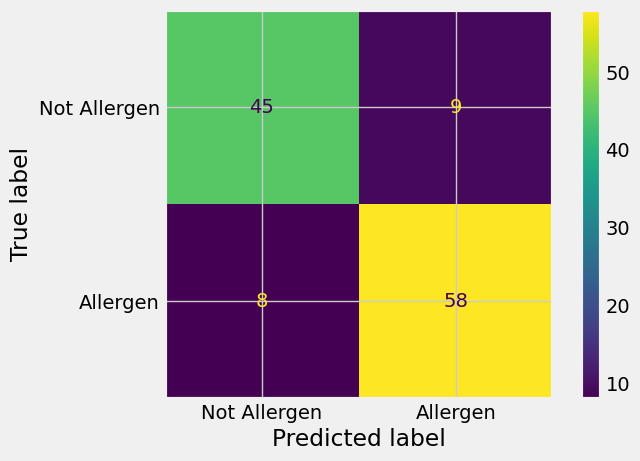

(0.9523809523809523, 0.8787878787878788)

In [ ]:
# hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start=50, stop=2000, num=2000)],
#                        learning_rate = [float(x) for x in np.linspace(start=0.001, stop=0.1, num=200)],
#                        algorithm = ['SAMME','SAMME.R'])
# adaboost_tuned2 = RandomizedSearchCV(AdaBoostClassifier(random_state=17), hyperparameters, cv=5,scoring='recall')
# adaboost_tuned2.fit(X_train,Y_train)
# model_eval(adaboost_tuned2)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:43:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Recall train score: 0.9218390804597701
Recall test score: 0.9479768786127167
Precision train score: 0.9733009708737864
Precision test score: 0.9647058823529412
Accuracy train: 0.9376731301939059
Accuracy test: 0.9516129032258065
Roc_auc train score: 0.9417557771636831
Roc_auc test score: 0.9520906290873804
f1 train score: 0.9468713105076741
f1 test score 0.956268221574344


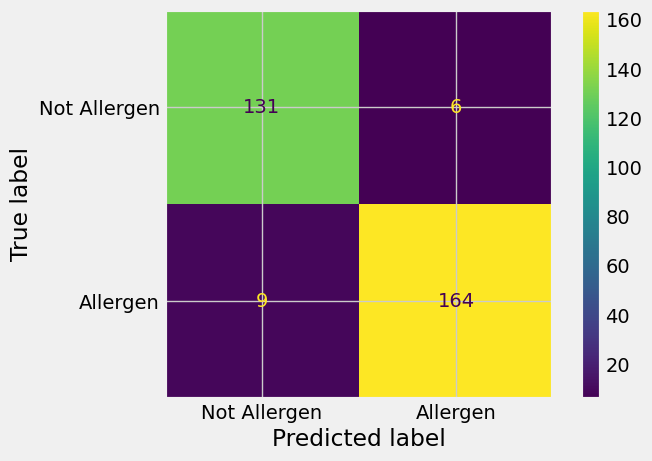

(0.9218390804597701, 0.9479768786127167)

In [74]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# تعريف قيم المعاملات التي سيتم تجربتها
hyperparameters = {
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=2000, num=50)],
    'learning_rate': [float(x) for x in np.linspace(start=0.01, stop=0.3, num=30)],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'subsample': [0.5, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.8, 0.9, 1.0]
}
# تهيئة البحث العشوائي
xgb_tuned = RandomizedSearchCV(
    XGBClassifier(random_state=17, use_label_encoder=False, eval_metric='logloss'),
    hyperparameters,
    cv=5,
    n_iter=50,  # عدد التجارب العشوائية، يمكنك تغييره حسب وقت التدريب
    scoring='recall',
    verbose=1,
    n_jobs=-1
)
# تدريب النموذج على بيانات التدريب
xgb_tuned.fit(X_train, Y_train)

# تقييم النموذج (افترض أنك لديك دالة جاهزة اسمها model_eval)
# model_eval(xgb_tuned)

In [82]:
cv(xgb_tuned)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 

In [ ]:
# cv(adaboost_tuned2)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 

Data train Cross Validate Standard Deviation: 0.009985997030114555
Data train recall mean: 0.931204252352736
Data test recall mean: 0.8829302987197722


After finished hyperparameter tuning, the recall score for data test rise from 88% to 89%. Recall score is improved while waiting time is decreased with Randomized Search CV.  The standard deviation does not differ considerably from other algorithms and retain its consistency. <br>

## Feature Importance
In this section, the important features  that impact the Adaboost Hyperparameter Tuning Output will be displayed in this section. In this project, SHAP (**SH**apely **A**dditive ex**P**lanation) values is used to interpret the model so the model can be understandable to read. The outcome can serve as the focal point to determining the critical factor that may influence allergens in food product.

In [ ]:
# explainer = shap.explainers.Permutation(adaboost_tuned2.predict, X_test, feature_names=X_train.columns.to_list(), max_evals=1249)
# shap_values = explainer(X_test)

PermutationExplainer explainer:  26%|██▌       | 31/120 [06:52<20:55, 14.11s/it]

In [77]:
import shap

# إنشاء مفسر SHAP باستخدام نموذج XGBoost
explainer = shap.Explainer(xgb_tuned.best_estimator_, X_test)

# حساب قيم SHAP للبيانات
shap_values = explainer(X_test)


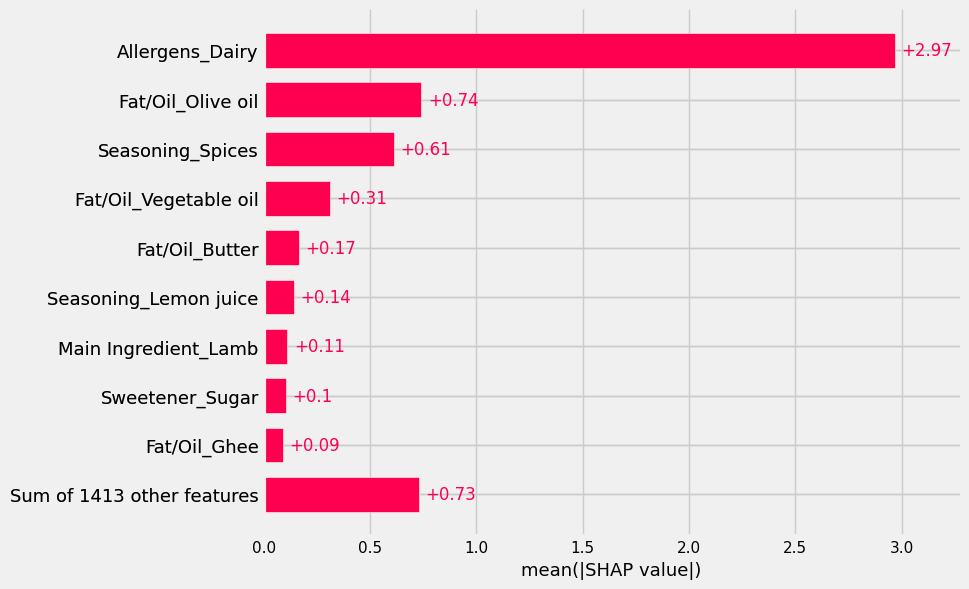

In [78]:
#Shap bar
shap.plots.bar(shap_values)


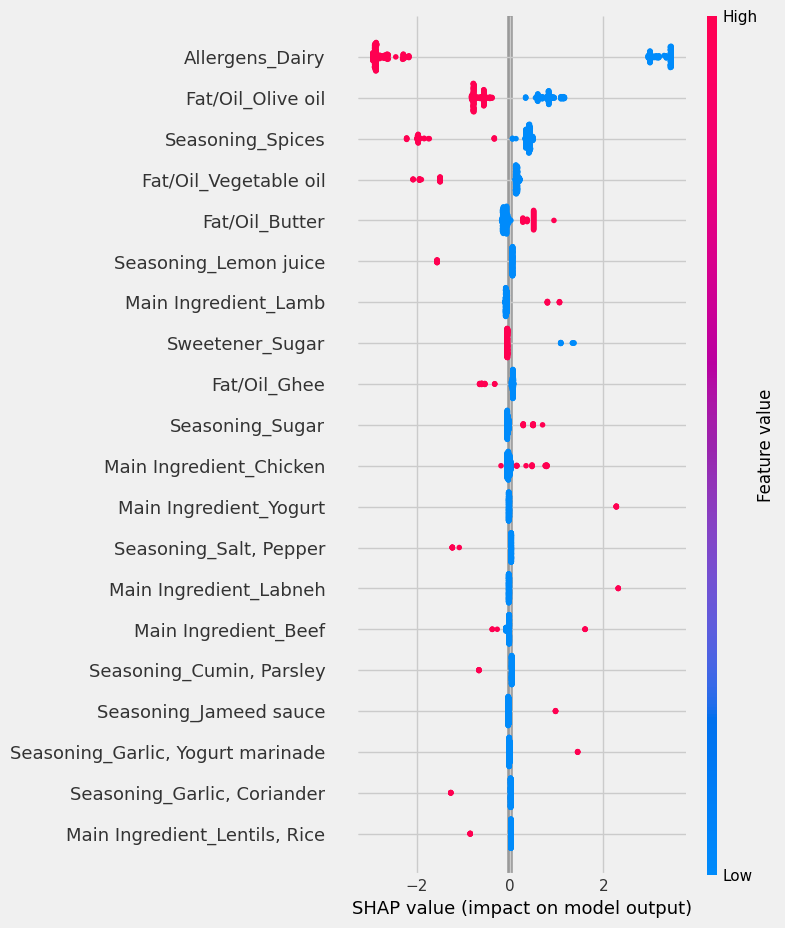

In [79]:
# رسم ملخص SHAP لجميع السمات
shap.summary_plot(shap_values, X_test)


Based on the horizontal bar above. Five main features can be highlighted: **Allergens_Diary, Fat/Oil_Olive Oil, Fat/Oil_Vegetable Oil, Fat/Oil_Oil, Fat/Oil_Coconut Milk, and Main Ingredient_Mixed Vegetables**. <br>
Diary or milk product is a common food ingredient that can trigger food allergy, particularly the Cow's Milk Protein Allergy (CMPA). Children experience the most allergy reactions from diary due to the immune system are still developing. The reaction iis affect the digestive systems that could cause vomiting, abdominal pain, asthma, constipation, dermatitis, and other clinical disorders (Rangel et al., 2016). <br>
Vegetable oil, with the exception of peanut oil, rarely allergic reaction since protein is removed during the refining process (Crevel et al., 2000). Cross-contamination from possible allergens at every stage of the food chain could be the cause (Taylor and Baumert, 2010).

## Conclusion
1. Majority of food products in dataset contains Allergens.
2. The food product with the greatest allergens content is the *Caesar Salad Wrap*.
3. *Chicken* as the main ingredient contributes the majority of the allergens in food products.
4. Majority of the food products with high customer satisfaction and average price shows exorbitants percentage of Allergens inside.
5. **Adaboost** models with hyperparameter tuning show the best performance and high recall among others. It means this model can be utilize to anticipate Allergen for future data and undergo additional adjustment
6. **Allergens_Diary, Fat/Oil_Olive Oil, Fat/Oil_Vegetable Oil, Fat/Oil_Oil, Fat/Oil_Coconut Milk, and Main Ingredient_Mixed Vegetables** are the five main features that affect output model and the allergens prediction.

## References : <br>
Crevel, R. W. R., Kerkhoff, M. A. T., Konino, M. M. G. (2000). Allergenicity of Refined Vegetable Oils. *Food and Chemical Technology* 38: 385-393. <br>

Rangel, A. H. N., Sales, D. C., Urbano, S. A., Júnior, J. G. B. G., Neto, J. C. A., and Macédo, C. S. (2016). Lactose intolerance and cow's milk protein allergy. *Food science and Technology Campinas* 36, 2: 179-187. <br>

Taylor, S. L., and Baumert, J. L. (2010). Cross-Contamination of Foods and Implications for Food Allergic Patients. *Current Allergy and Asthma Reports* 10, 4: 265-270.

Wang, X., Bouzembrak, Y., Lansink, A. O., and van der, H. J. (2021). Application of machine learning to the monitoring and prediction of food safety: A review. *Comprehensive Reviews in Food Science and Food Safety* 21: 416-434. <br>

Winterova, R., Bartošková, M. P., Kejík, Z., Rysová, J., Laknerová, I., Urban, M., and Šmídová, Z. (2021). Food allergies and intolerances - A Review. *Czech Journal of Food Sciences* 39, 5: 329-339.

In [80]:
import joblib
joblib.dump(xgb_tuned, "model.pkl")


['model.pkl']

In [81]:
final_columns= list(X_train.columns)
joblib.dump(final_columns, "columns.pkl")


['columns.pkl']

['preprocessor.pkl']

In [ ]:
# # تعريف الأعمدة
# categorical_cols = ['Food Product','Main Ingredient','Sweetener','Fat/Oil','Seasoning','Allergens']
# numerical_cols = ['Price ($)', 'Customer rating']
# target_col = 'Is_Allergen'

# preprocessor = ColumnTransformer([
#     ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols),
#     ("num", StandardScaler(), numerical_cols)
# ])

# # إنشاء خط الأنابيب
# model = Pipeline([
#     ("preprocessor", preprocessor),
#     ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
# ])

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier
# import joblib

# categorical_cols =  ['Food Product','Main Ingredient','Sweetener','Fat/Oil','Seasoning','Allergens']
# numeric_cols = ["Price ($)", "Customer rating"]

# preprocessor = ColumnTransformer([
#     ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
#     ("num", StandardScaler(), numeric_cols)
# ])

# pipeline = Pipeline([
#     ("preprocessor", preprocessor),
#     ("clf", adaboost_tuned2)
# ])

# # افترض X_train, y_train جاهزين
# pipeline.fit(X_train, y_train)

# # ثم حفظ الـ pipeline الكامل
# joblib.dump(pipeline, "pipeline.pkl")
